<a href="https://colab.research.google.com/github/miladziekanowska/stock-market-forecast-project/blob/main/Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing libraries and fixing problems with Talib ;)**

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib')
!./configure --prefix=/usr
!make
!sudo make install
os.chdir('../')
!pip install TA-Lib

In [ ]:
pip install Yahoo_fin


In [15]:
import datetime as dt
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as yh
import talib as ta
import matplotlib.pyplot as plt
import pandas_datareader as web
import matplotlib.dates as mdates

In [ ]:
ticker_list = yh.tickers_dow()
historical_datas = {}
for ticker in ticker_list:
    historical_datas[ticker] = yh.get_data(ticker, start_date="13/07/1993", end_date='now', index_as_date = True, interval="1d")

In [39]:
historical_datas['AAPL']

,open,high,low,close,adjclose,volume,ticker
1993-07-13,0.345982,0.345982,0.330357,0.332589,0.273418,158110400,AAPL
1993-07-14,0.328125,0.334821,0.319196,0.332589,0.273418,246299200,AAPL
1993-07-15,0.332589,0.337054,0.314732,0.319196,0.262408,338038400,AAPL
1993-07-16,0.254464,0.264509,0.236607,0.245536,0.201853,2120596800,AAPL
1993-07-19,0.250000,0.256696,0.227679,0.228795,0.188090,806232000,AAPL
...,...,...,...,...,...,...,...
2023-08-03,191.570007,192.369995,190.690002,191.169998,191.169998,61235200,AAPL
2023-08-04,185.520004,187.380005,181.919998,181.990005,181.990005,115799700,AAPL
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.850006,97576100,AAPL
2023-08-08,179.690002,180.270004,177.580002,179.800003,179.800003,67823000,AAPL


**RSI**

In [40]:
historical_datas['AAPL']['RSI'] = ta.RSI(historical_datas['AAPL']['close'].tail(400))

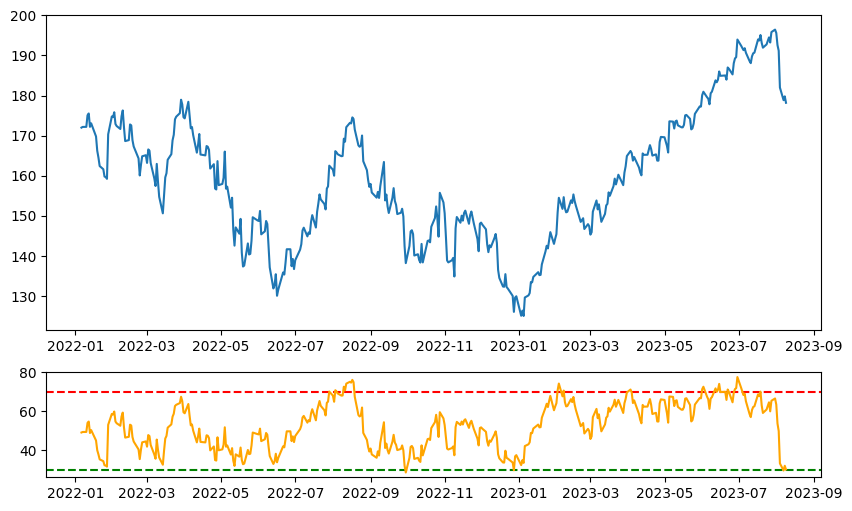

In [73]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')
axs[1].plot(historical_datas['AAPL']['RSI'].tail(400), color='orange')

In [ ]:
historical_datas['AAPL']['RSI'].head(15)

In [ ]:
historical_datas['AAPL']['RSI_signal'] = 'HOLD'  # Inicjalizacja sygnałów na 'HOLD'

rsi_values = historical_datas['AAPL']['RSI']
rsi_signals = []

#Dopisanie sygnałów do kolumny RSI_signals
for rsi in rsi_values:
    if rsi < 30:
        rsi_signals.append('BUY')
    elif rsi > 70:
        rsi_signals.append('SELL')
    else:
        rsi_signals.append('HOLD')

historical_datas['AAPL']['RSI_signal'] = rsi_signals


In [ ]:
historical_datas['AAPL'].tail(30)

**MACD**

<ipython-input-71-f8c304f61ab3>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs[1].plot(macd_signal, 'b-', color='red')


<BarContainer object of 400 artists>

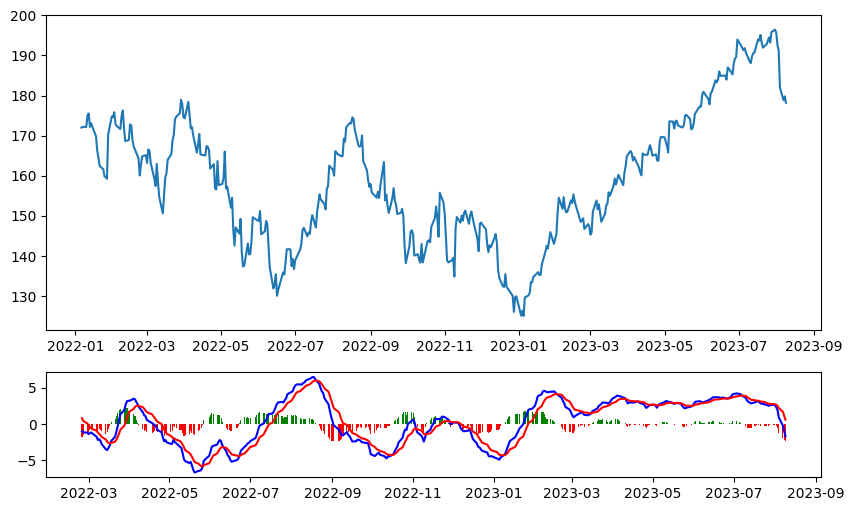

In [71]:
macd, macd_signal, macd_hist = ta.MACD(historical_datas['AAPL']['close'].tail(400))

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios":[3,1]}, figsize=(10, 6))

c = ["red" if cl < 0 else "green" for cl in macd_hist]

axs[0].plot(historical_datas['AAPL']['close'].tail(400))
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, 'b-', color='red')
axs[1].bar(macd_hist.index, macd_hist, color=c)

Wskaźnik ładnie wygląda i sam z niego korzystam w praktyce, ale nie wiem jak przenieść sygnały sprzedaży/kupna z niego do dfa :🇩

Ogólna zasada jest taka, że jak macd przetnie macd_signal od dołu jest to sygnał kupna, a jak od góry to sygnał sprzedaży.



SMA100 & EMA100

In [77]:
historical_datas['AAPL']['SMA100'] = ta.SMA(historical_datas['AAPL']['close'], 100)
historical_datas['AAPL']['EMA100'] = ta.EMA(historical_datas['AAPL']['close'], 100)

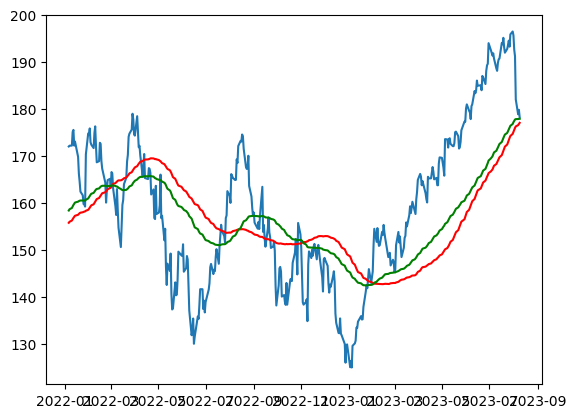

In [83]:
plt.plot(historical_datas['AAPL']['close'].tail(400))
plt.plot(historical_datas['AAPL']['SMA100'].tail(400), color="r")
plt.plot(historical_datas['AAPL']['EMA100'].tail(400), color="g")

Tuataj podobnie jak z macd, nie do końca wiem jak stworzyć sygnały, bo to bardziej metoda wizualna.
Jutro wieczorem postaram się poszukać innych wskaźników.

In [98]:
!git remote -v

origin	https://github.com/miladziekanowska/stock-market-forecast-project.git (fetch)
origin	https://github.com/miladziekanowska/stock-market-forecast-project.git (push)


In [ ]:
!git touch